In [1]:
import  numpy
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys
import os
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#### Reading data into Pandas Dataframe

In [3]:
file_name = 'car_data.csv'
df = pd.read_csv(file_name, skipinitialspace = True)

### Data Preprocessing

In [4]:
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.shape

(301, 9)

In [7]:
df[df.duplicated()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [8]:
# Dropping duplicate recrods from the dataframe
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(299, 9)

In [10]:
#Checking for null values
df.isnull().any()  # No missing values found. Data is complete

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
dtype: bool

### Exploratory Data Analysis

#### 1. Data distribution across years (Histogram for Year in which the vehicle was bought)
##### Observation: Most of the data is available from 2010 to 2018  (left skewed or negatively skewed)

Text(0, 0.5, 'Number Of vehicles bought')

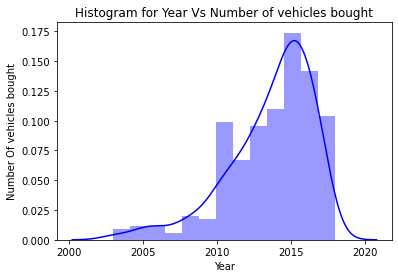

In [11]:
sns.distplot(df['Year'], kde=True, color='blue')
plt.title('Histogram for Year Vs Number of vehicles bought', fontsize=12)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Number Of vehicles bought', fontsize=10)

#### 2. Selling Price Vs Number of vehicles sold  (Histogram for Selling Price)
##### Observation: 30% of the sold vehicles are within the range of 0.1 to 2 Lakhs  (Right skewed)

Text(0, 0.5, 'Number Of vehicles bought')

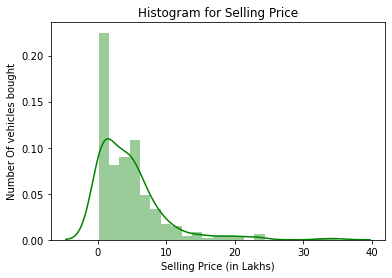

In [12]:
sns.distplot(df['Selling_Price'], kde=True, color='green')
plt.title('Histogram for Selling Price', fontsize=12)
plt.xlabel('Selling Price (in Lakhs)', fontsize=10)
plt.ylabel('Number Of vehicles bought', fontsize=10)

#### 3. Present Price Vs Number of vehicles sold  (Histogram for Showroom/Present Price)
##### Observation: 30% of the sold vehicles are within the range of 0.3 to 2 Lakhs  (Right skewed)

Text(0, 0.5, 'Number Of vehicles bought')

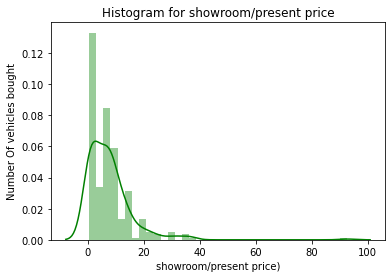

In [13]:
#Histogram for showroom/present price
sns.distplot(df['Present_Price'], kde=True, color='green')
plt.title('Histogram for showroom/present price', fontsize=12)
plt.xlabel('showroom/present price)', fontsize=10)
plt.ylabel('Number Of vehicles bought', fontsize=10)
# plt.ticklabel_format(style='sci', axis='Present_Price')
# plt.show()

#### 4. Number of vehicles sold via Dealer Vs Individual
##### Observation: 60% of the sales are done through Dealers

<AxesSubplot:xlabel='Seller_Type', ylabel='count'>

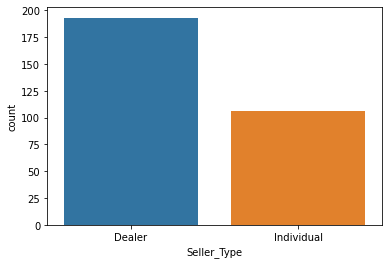

In [14]:
# For all petrol,diesel and cng vehicle types the dealer seller count is more than Individual
sns.countplot(x='Seller_Type',data=df)

#### 5. Transmission type VS Number of Cars sold
##### Observation: Demand is more for Manual transmission vehicles 

<AxesSubplot:xlabel='Transmission', ylabel='count'>

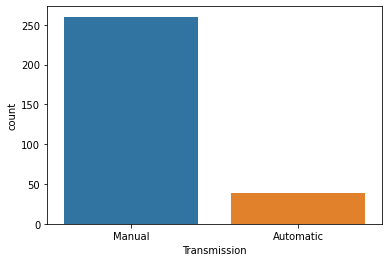

In [15]:
sns.countplot(x='Transmission',data=df)

#### 6. Price range across different trasmission types

##### The number of Automatic transmission vehicles sold are uniformly distributed across the selling price range 0.3 to 23 Lakhs.
##### Whereas in Manual type, most of the sales are within the range of <15 Lakhs. The reason being all bikes are manual and therefore the selling price is more on the lower range.

<AxesSubplot:xlabel='Transmission', ylabel='Selling_Price'>

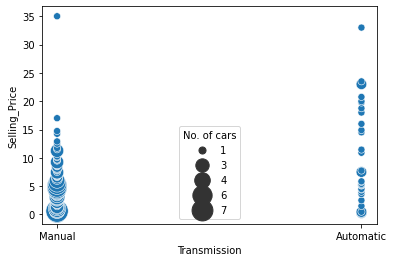

In [16]:
plt_df = df.groupby(['Selling_Price', 'Transmission']).size().to_frame(name="No. of cars").reset_index()
# sns.scatterplot(y='Selling_Price',x='Transmission',hue='Transmission', data=df)
sns.scatterplot(y='Selling_Price',x='Transmission', size='No. of cars', sizes = (50,500)
                 ,data=plt_df)

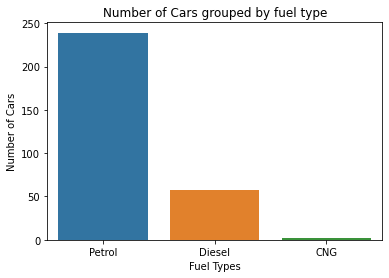

In [17]:
# Number of cars grouped by fuel type
sns.countplot(data=df,x="Fuel_Type")
plt.title('Number of Cars grouped by fuel type')
plt.ylabel('Number of Cars')
plt.xlabel('Fuel Types')
plt.show()

#### 7. Number distinct vehicle names available in the dataset
##### Observation: We have 98 distinct vehicle names and name of companies won’t affect car’s price. Price depends upon how many year it’s been used ,fuel type etc,.

In [18]:
len(df["Car_Name"].unique())

98

In [19]:
df.drop('Car_Name', inplace= True, axis=1)
print("Car_Name feature is dropped from the dataset")

Car_Name feature is dropped from the dataset


In [20]:
# Dividing the features into Numerical and Categorical

numericaldata = df.select_dtypes(include=['number']).columns.tolist()
categoricaldata = df.select_dtypes(include=['object']).columns.tolist()

In [21]:
# Converting categorical features to numerical
df = pd.get_dummies(df, columns=categoricaldata, drop_first=True, sparse=True)
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,1,0,1
1,2013,4.75,9.54,43000,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,1,0,1
3,2011,2.85,4.15,5200,0,0,1,0,1
4,2014,4.60,6.87,42450,0,1,0,0,1


In [22]:
# Feature Engineering - Creating a new Feature called age_of_car
df['current_year']='2021'
df['current_year'] = df['current_year'].astype(int)
df['age_of_car']=df['current_year'] - df['Year']

In [23]:
df.head(5)

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,current_year,age_of_car
0,2014,3.35,5.59,27000,0,0,1,0,1,2021,7
1,2013,4.75,9.54,43000,0,1,0,0,1,2021,8
2,2017,7.25,9.85,6900,0,0,1,0,1,2021,4
3,2011,2.85,4.15,5200,0,0,1,0,1,2021,10
4,2014,4.60,6.87,42450,0,1,0,0,1,2021,7


In [24]:
#Dropping the Year and Current Year as no longer required
df.drop(['Year','current_year'],inplace=True, axis=1)

In [25]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,age_of_car
0,3.35,5.59,27000,0,0,1,0,1,7
1,4.75,9.54,43000,0,1,0,0,1,8
2,7.25,9.85,6900,0,0,1,0,1,4
3,2.85,4.15,5200,0,0,1,0,1,10
4,4.60,6.87,42450,0,1,0,0,1,7


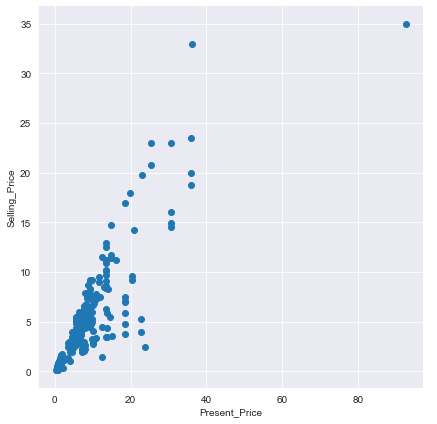

In [26]:
sns.set_style("darkgrid")
sns.FacetGrid(df,height=6).map(plt.scatter,"Present_Price","Selling_Price").add_legend()
plt.show()

# We can see linear relationship between Selling_Price and Present_Price

# Correct below code

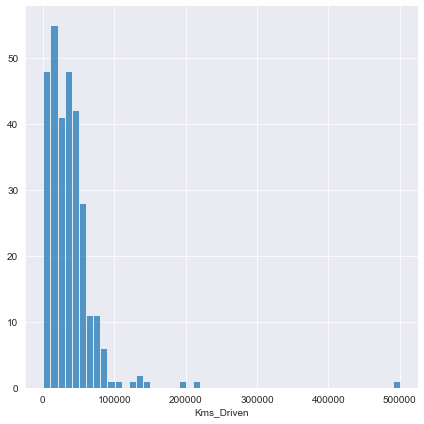

In [27]:
sns.set_style("darkgrid")
sns.FacetGrid(df,height=6).map(sns.histplot,"Kms_Driven")
# plt.xlabel("Distance Travel",Fontsize=20)
# plt.ylabel("Demand",Fontsize=20)
# plt.show()

#### Feature Selection

#### 1. Filter Method (Using Correlation Coefficient)

##### Observations:
##### i) Present_Price and Selling_Price are positively correlated
##### ii) Number of previous owners does not have significant effect on the Selling Price

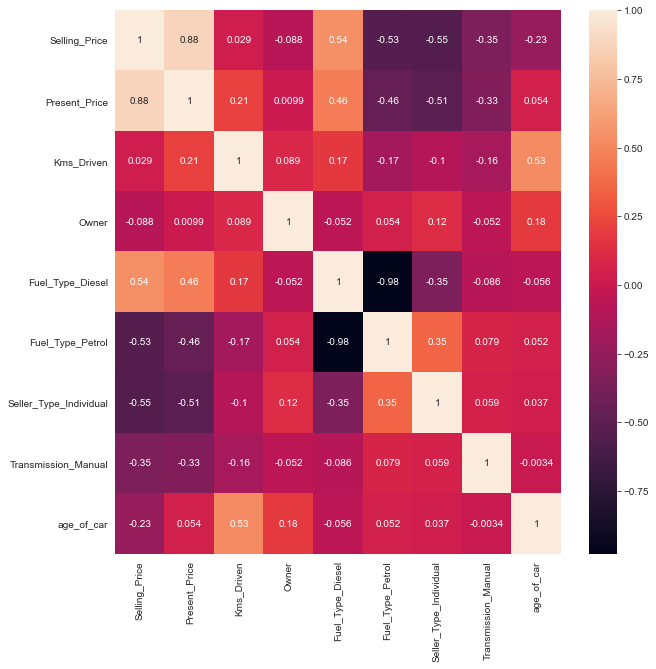

In [28]:
corr = df.corr()
corr_features = corr.index
plt.figure(figsize=(10,10))
g = sns.heatmap(df[corr_features].corr(), annot=True)

In [29]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,age_of_car
0,3.35,5.59,27000,0,0,1,0,1,7
1,4.75,9.54,43000,0,1,0,0,1,8
2,7.25,9.85,6900,0,0,1,0,1,4
3,2.85,4.15,5200,0,0,1,0,1,10
4,4.60,6.87,42450,0,1,0,0,1,7


In [30]:
X = df.iloc[:,1:9]
y = df.iloc[:,0:1]
# print(X)
# print(y)

#### 2. Using Tree Classifier

##### Observation: Present_Price has the highest importance in predicting the target variable Selling Price, whereas the number of previous owners has less significance.


[0.4374374  0.04094254 0.00074106 0.08689777 0.02157481 0.24059593
 0.08719694 0.08461356]


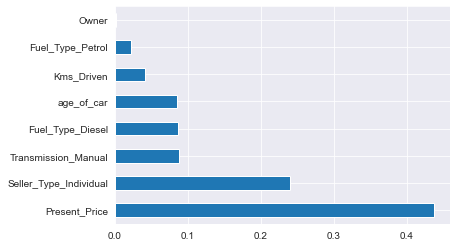

In [31]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_)
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns) 
feat_importances.nlargest(9).plot(kind='barh')
plt.show()

In [32]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,age_of_car
0,3.35,5.59,27000,0,0,1,0,1,7
1,4.75,9.54,43000,0,1,0,0,1,8
2,7.25,9.85,6900,0,0,1,0,1,4
3,2.85,4.15,5200,0,0,1,0,1,10
4,4.60,6.87,42450,0,1,0,0,1,7


In [33]:
# from scipy.stats import pearsonr
# list_PresentPrice=df['Fuel_Type_Diesel']
# list_SellingPrice=df['Selling_Price']
# corr, _ = pearsonr(list_PresentPrice, list_SellingPrice)
# # print('Pearsons correlation: %.3f' % corr)

In [40]:
# Pearson correlation between selling price and different features
from scipy.stats import pearsonr
list_SellingPrice=df['Selling_Price']
for i in df.columns:
    list_i=df[i]
    corr, _ = pearsonr(list_i, list_SellingPrice)
    print(i)
    print('Pearsons correlation: %.3f' %corr)
    print('\n')

Selling_Price
Pearsons correlation: 1.000


Present_Price
Pearsons correlation: 0.876


Kms_Driven
Pearsons correlation: 0.029


Owner
Pearsons correlation: -0.088


Fuel_Type_Diesel
Pearsons correlation: 0.544


Fuel_Type_Petrol
Pearsons correlation: -0.532


Seller_Type_Individual
Pearsons correlation: -0.554


Transmission_Manual
Pearsons correlation: -0.349


age_of_car
Pearsons correlation: -0.234




# Compare the feature selection techniques

### Building the Model

#### 1. Random Forest Regressor

In [35]:
#Splitting the dataset into test and train
x_train,x_test,y_train,y_test = train_test_split(X,y, random_state = 0)

In [36]:
#Random Forest Model

from sklearn.metrics import r2_score
Rf = RandomForestRegressor(n_estimators = 15,criterion = 'mse',random_state = 20,n_jobs = -1)
Rf.fit(x_train,y_train)
Rf_train_pred = Rf.predict(x_train)
Rf_test_pred = Rf.predict(x_test)
r2_score(y_test,Rf_test_pred)
# print(y_test)


0.8999070807680773

# Evaluate and print Classification report, confusion matrix, F1 score and plot of decision boundary

#### 2. Linear Regression

In [37]:
#Linear Regression Model

from sklearn.linear_model import LinearRegression
from sklearn import linear_model
lreg = linear_model.LinearRegression()
lreg.fit(x_train,y_train)
y_train_pred = lreg.predict(x_train)
y_test_pred = lreg.predict(x_test)
lreg.score(x_test,y_test)

0.80896262288586

# Evaluate and print Classification report, confusion matrix, F1 score and plot of decision boundary